In [ ]:
import torch
from itertools import product
import torch.nn.functional as F
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
from collections import Counter
from src.bio_utils import seqlogo_from_msa
import logomaker as lm
from src.utils import save_fig, defaultStyle
from scipy.stats import mode
from math import ceil, floor, sqrt
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import time
from src.utils import save_fig, defaultStyle
import RNA
defaultStyle(fs=18)
virus_name = 'INFL'
date = '0522' # 0719

In [ ]:
# add_transcrib_eff(virus_name,date)
# random split train test data
# random_split(virus_name,date)
# consider distribution split train test data
split_for_distribu(virus_name,date)
# 0603 is the ave of 30 day, 0719 is the 28 day-1, 0720 is the 28 day-2, 0721 is the ave of 28 day

In [ ]:
model_name = 'MotifFind'
data_model = np.load(f"temp/{virus_name}_{date}/{model_name}_{virus_name}_{date}.npy", allow_pickle=True).item()
epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['time_cost']  
print(test_r2)
model_name = 'DeepCNN_BiLSTM'
data_model = np.load(f"temp/{virus_name}_{date}/{model_name}_{virus_name}_{date}.npy", allow_pickle=True).item()
epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['time_cost']  
print(test_r2)
model_name = 'DeepCNN'
data_model = np.load(f"temp/{virus_name}_{date}/{model_name}_{virus_name}_{date}.npy", allow_pickle=True).item()
epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['time_cost']  
print(test_r2)
model_name = 'linearReg'
data_model = np.load(f"temp/{virus_name}_{date}/{model_name}_{virus_name}_{date}.npy", allow_pickle=True).item()
epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['time_cost']  
print(test_r2)

In [ ]:
num = 0
idx = 0
idx_l = 5
idx_a = 0
model_name = 'MotifLocation'
_, ax = plt.subplots(1, 1, figsize=(20,3))
for num in range(1,75):
    idx_l +=1
    idx +=1 
    data_model = np.load(f"temp/{virus_name}_{model_name}_paras/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
    epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
    if test_r2 <0:
        test_r2 = 0
    ax.bar(idx_l,test_r2)
ax.set_xticks([])
ax.set_ylabel('$R^2$')
ax.set_xlim([0,85])
save_fig(f'{virus_name}_{model_name}_paras')

In [ ]:
model_name = 'MotifFind'
num = 0
idx = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for begin in range(1,26):
    idx +=1
    for num in range(begin,126,25):
        idx +=1
        data_model = np.load(f"temp/MotifFind_paras/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
        epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
        ax.bar(idx,test_r2)
    
model_name = 'MotifFind'
num = 0
idx = 0
idx_l = 0
idx_a = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for idx_a in range(0,125,25):
    for idx in range(1,6):
        idx_l +=1
        for num in range(idx+idx_a,26+idx_a,5):
            idx_l +=1
            idx +=1 
            data_model = np.load(f"temp/MotifFind_paras/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
            epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
            ax.bar(idx_l,test_r2)

model_name = 'MotifFind'
num = 0
idx = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for idx_a in range(0,125,5):
    idx +=1
    for num in range(1+idx_a,6+idx_a):
        idx +=1
        data_model = np.load(f"temp/MotifFind_paras/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
        epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
        ax.bar(idx,test_r2)

In [ ]:
model_name = 'MotifFind'
num = 0
idx = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for begin in range(1,21):
    idx +=1
    for num in range(begin,81,20):
        idx +=1
        data_model = np.load(f"temp/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
        epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
        ax.bar(idx,test_r2)

In [ ]:
model_name = 'MotifFind'
num = 0
idx = 0
idx_l = 0
idx_a = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for idx_a in range(0,80,20):
    for idx in range(1,6):
        idx_l +=1
        for num in range(idx+idx_a,21+idx_a,5):
            idx_l +=1
            idx +=1 
            data_model = np.load(f"temp/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
            epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
            ax.bar(idx_l,test_r2)

In [ ]:
model_name = 'MotifFind'
num = 0
idx = 0
_, ax = plt.subplots(1, 1, figsize=(20,3))
for idx_a in range(0,80,5):
    idx +=1
    for num in range(1+idx_a,6+idx_a):
        idx +=1
        data_model = np.load(f"temp/{model_name}_{virus_name}_{date}_paras_{num}.npy", allow_pickle=True).item()
        epoch_loss, epoch_r, test_r2 = data_model["epoch_loss"], data_model["epoch_r"], data_model['test_r2']  
        ax.bar(idx,test_r2)

In [ ]:
def add_transcrib_eff(virus_name, date):
    data_df = pd.read_csv(f"./data/{virus_name}_{date}.csv")
    utr_df = pd.read_csv('../data/sequencing/tol_seq.csv', usecols=['utr','pre_exp'])
    data_df['utr'] = data_df.seq.str[:5]
    merge_df = pd.merge(left=data_df,right=utr_df,how='inner',on='utr')
    merge_df['score_final'] = merge_df.score - merge_df.pre_exp
    merge_df.to_csv(f'./data/{virus_name}_{date}_tol_seq.csv',index=None)

def seq2tensor(X):
    corpus = ["".join(s) for s in list(product(*["ACGT"]))]
    tok2idx = {s: i for i, s in enumerate(corpus)}
    X = [[tok2idx[X[j][i : i + 1]] for i in range(len(X[j]))] for j in range(len(X))]
    X = torch.tensor(X).type(torch.int64)
    X = F.one_hot(X,num_classes=4).type(torch.float)
    return X

def struc2tensor(X):
    corpus = ["".join(s) for s in list(product(*[".()"]))]
    tok2idx = {s: i for i, s in enumerate(corpus)}
    X = [[tok2idx[X[j][i : i + 1]] for i in range(len(X[j]))] for j in range(len(X))]
    X = torch.tensor(X).type(torch.int64)
    X = F.one_hot(X,num_classes=3).type(torch.float)
    return X

def seq2tsor_transformer(X):
    corpus = ["".join(s) for s in list(product(*["ACGT"]))]
    tok2idx = {s: i for i, s in enumerate(corpus)}
    X = [[tok2idx[X[j][i : i + 1]] for i in range(len(X[j]))] for j in range(len(X))]
    X = torch.LongTensor(X)
    return X

def random_split(virus_name,date):
    merge_df = pd.read_csv(f'./data/{virus_name}_{date}_tol_seq.csv')
    train, test = train_test_split(merge_df, test_size=0.05)
    train.to_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv',index=None)
    test.to_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv',index=None)

def split_for_distribu(virus_name,date):
    data1 = pd.read_csv(f'./data/{virus_name}_{date}_tol_seq.csv')
    data1 = data1.sort_values(by = [ 'distance' , 'rna_counts' ], ascending= ( True , False ))
    test_data = pd.DataFrame(columns=data1.columns)
    train_data = pd.DataFrame(columns=data1.columns)
    for i in range(1 , data1.distance.max()+1 , 1):
        data2 = data1.loc[data1['distance'] == i]
        for j in range(int(len(data2) / 20 )):
            df1 = data2.iloc[1 + j * 19]  
            test_data = pd.concat([test_data,pd.DataFrame(df1).transpose()])
    df2 = pd.concat([data1,test_data])
    train_data = df2.drop_duplicates(subset=['ID'],keep=False)
    train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
    train_data.to_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', index = None)
    test_data.to_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', index = None)

def count_paras(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# VEE
para_list = []
for lay1 in range(3,10,2):
    for lay2 in range(3,19,4):
        for lay3 in range(3,13,2):
            para_list.append([lay1,lay2,lay3])
len(para_list)
# para_list
# SFV
para_list = []
for lay1 in range(3,23,4):
    for lay2 in range(3,23,4):
        for lay3 in range(3,23,4):
            para_list.append([lay1,lay2,lay3])
len(para_list)
# para_list

para_list = []
for lay1 in range(0,85-11):
        para_list.append([lay1,lay1+11])
len(para_list)

In [ ]:
model = MotifFind(paras=paras)
count_paras(model)
# 177 308129 545793 8426

In [ ]:
class linearReg(nn.Module):
    def __init__(self):
        super(linearReg, self).__init__()
        self.reg = nn.Linear(4*44,1)
        
    def forward(self, x):
        x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])
        y_pre = self.reg(x)[:,0]
        return y_pre

In [ ]:
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.convs1_l = nn.Conv1d(4, 128, 5, padding=2)
        self.convs2_l = nn.Conv1d(128, 128, 7, padding=3)
        self.convs3_l = nn.Conv1d(128, 128, 9, padding=4)
        self.convs4_l = nn.Conv1d(128, 16, 21, padding=10)
        self.relu = nn.ReLU()
        self.drop_c1_l = nn.Dropout(0.1)
        self.drop_c2_l = nn.Dropout(0.2)
        self.reg = nn.Linear(16,1)
        

    def forward(self, x):
        c1_l = self.drop_c1_l(self.relu(self.convs1_l(x)))
        c2_l = self.drop_c2_l(self.relu(self.convs2_l(c1_l)))
        c3_l = self.drop_c2_l(self.relu(self.convs3_l(c2_l)))
        c4_l = self.drop_c1_l(self.relu(self.convs4_l(c3_l)))
        cnn_out_l = F.max_pool1d(c4_l, int(c4_l.size(2))).squeeze(2)
        y_pre = self.reg(cnn_out_l)[:,0]
        return y_pre

In [ ]:
class DeepCNN_BiLSTM(nn.Module):
    def __init__(self):
        super(DeepCNN_BiLSTM, self).__init__()
        self.convs1_l = nn.Conv1d(4, 128, 5, padding=2)
        self.convs2_l = nn.Conv1d(128, 128, 7, padding=3)
        self.convs3_l = nn.Conv1d(128, 128, 9, padding=4)
        self.relu = nn.ReLU()
        self.drop_c1_l = nn.Dropout(0.1)
        self.drop_c2_l = nn.Dropout(0.2)
        self.bilstm = nn.LSTM(128,128,num_layers=1,batch_first=True,bidirectional=True)
        self.fc1 = nn.Linear(128 + 128, 64)
        self.reg = nn.Linear(64,1)
        

    def forward(self, x):
        c1_l = self.drop_c1_l(self.relu(self.convs1_l(x)))
        c2_l = self.drop_c2_l(self.relu(self.convs2_l(c1_l)))
        c3_l = self.drop_c2_l(self.relu(self.convs3_l(c2_l)))
        cnn_out_l = F.max_pool1d(c3_l, c3_l.shape[2] // 20).permute(0,2,1)
        _, (h_n, c_n) = self.bilstm(cnn_out_l)
        bilstm_out = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        f1 = self.relu(self.fc1(bilstm_out))
        y_pre = self.reg(f1)[:,0]
        return y_pre

In [ ]:
class MotifFind(nn.Module):
    def __init__(self,paras):
        super(MotifFind, self).__init__()
        self.convs1_l1 = nn.Conv1d(4, 1, paras[0], padding='same')
        self.convs1_l2 = nn.Conv1d(4, 1, paras[1], padding='same') 
        self.convs1_l3 = nn.Conv1d(4, 1, paras[2], padding='same')
        self.convs2_l = nn.Conv1d(3*1, paras[3], 21, padding='same')   
        self.actia = nn.Softplus()

    def forward(self, x):
        x1 = x[:, :, 0:10]  # 20
        x2 = x[:, :, 11:30] # 21:40
        x3 = x[:, :, 31:44] # 41:60
        # x1 = x[:, :, 0:20]  # 20
        # x2 = x[:, :, 21:40] # 21:40
        # x3 = x[:, :, 41:60] # 41:60
        c1_l1 = self.actia(self.convs1_l1(x1))
        c1_l2 = self.actia(self.convs1_l2(x2))
        c1_l3 = self.actia(self.convs1_l3(x3))
        max_len = 21
        c1_l1 = F.pad(c1_l1, (0, max_len - c1_l1.size(2)))
        c1_l2 = F.pad(c1_l2, (0, max_len - c1_l2.size(2)))
        c1_l3 = F.pad(c1_l3, (0, max_len - c1_l3.size(2)))
        c1_l = torch.cat((c1_l1, c1_l2, c1_l3), dim=1)    
        c2_l = self.actia(self.convs2_l(c1_l))
        cnn_out1 = F.max_pool1d(c2_l, int(c2_l.size(2)))
        cnn_out = cnn_out1.squeeze(2)
        y_pre = torch.log(cnn_out.sum(axis=1))
        return y_pre

In [ ]:
class MotifEffect(nn.Module):
    def __init__(self,paras):
        super(MotifEffect, self).__init__()
        self.convs1_l = nn.Conv1d(4, 3, 9, padding=3) # 21
        self.convs2_l = nn.Conv1d(3, 128, 44, padding=42)
        self.actia = nn.Softplus()
        

    def forward(self, x):
        c1_l = self.actia(self.convs1_l(x))
        c2_l = self.actia(self.convs2_l(c1_l))
        cnn_out1 = F.max_pool1d(c2_l, int(c2_l.size(2)))
        cnn_out = cnn_out1.squeeze(2)
        y_pre = torch.log(cnn_out.sum(axis=1))
        return y_pre

In [273]:
class MotifEffectClear(nn.Module):
    def __init__(self,paras):
        super(MotifEffectClear, self).__init__()
        self.convs1_l = nn.Conv1d(7, 2, 5, padding='same') # 2 for SFV
        self.convs2_l = nn.Conv1d(2, 2, 26, padding='same') # 2 for SFV 128 for VEE
        self.actia = nn.Softplus()
        self.alpha = 1e-4
        

    def forward(self, x):
        c1_l = self.actia(self.convs1_l(x))
        c2_l = self.actia(self.convs2_l(c1_l))
        cnn_out1 = F.max_pool1d(c2_l, int(c2_l.size(2)))
        cnn_out = cnn_out1.squeeze(2)
        y_pre = torch.log(cnn_out.sum(axis=1))
        return y_pre

In [ ]:
class MotifLocation(nn.Module):
    def __init__(self,paras):
        super(MotifLocation, self).__init__()
        self.convs1_l1 = nn.Conv1d(4, 1, 9, padding='same')
        self.convs1_l2 = nn.Conv1d(4, 1, 9, padding='same') 
        self.convs2_l = nn.Conv1d(1*1, 128, 21, padding='same')   
        self.actia = nn.Softplus()
        self.para1 = paras[0]
        self.para2 = paras[1]

    def forward(self, x):
        x1 = x[:, :, self.para1:self.para2]  # 20
        # x2 = x[:, :, 31:44] # 21:40

        c1_l1 = self.actia(self.convs1_l1(x1))
        # c1_l2 = self.actia(self.convs1_l2(x2))
        # c1_l3 = self.actia(self.convs1_l3(x3))
        max_len = 21
        c1_l1 = F.pad(c1_l1, (0, max_len - c1_l1.size(2)))
        # c1_l2 = F.pad(c1_l2, (0, max_len - c1_l2.size(2)))
        # c1_l3 = F.pad(c1_l3, (0, max_len - c1_l3.size(2)))
        # c1_l = torch.cat((c1_l1, c1_l2), dim=1)    
        c2_l = self.actia(self.convs2_l(c1_l1))
        cnn_out1 = F.max_pool1d(c2_l, int(c2_l.size(2)))
        cnn_out = cnn_out1.squeeze(2)
        y_pre = torch.log(cnn_out.sum(axis=1))
        return y_pre

# only 1:0 untrainable only2:0.32 only3:0.42 1&2:0.76 1&3:.84 2&3:0.59 
# only 1:0.71 only2:0.31 only3:0.0.33 only4:0.35 1&2: 1&3: 2&3:

In [ ]:
num = 0
# for paras in para_list: # 15,9,9
for paras in [[9,9,9,3]]:
    num +=1
    time_start = time.time()
    model = MotifEffectClear(paras=paras)
    model_name = 'MotifEffectClear'
    # model = DeepCNN_BiLSTM()
    # model_name = 'DeepCNN_BiLSTM'

    data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                    usecols=['seq','score_final'])
    data.columns = ['seq','score']
    model.train()
    criterion = nn.MSELoss()
    batch_num = 64
    epochs = 50
    opt = torch.optim.Adam(model.parameters(), lr=5e-3) # suitable for motiffind deepcnn
    # opt = torch.optim.Adam(model.parameters(), lr=3e-4) # suitable for deepcnn bilstm
    epoch_loss = []
    epoch_r = []
    epoch_r2 = []
    for epoch in tqdm(range(epochs)):
        losses = []
        pearsonrs = []
        r2s = []
        data_random = data.sample(n=len(data)).reset_index(drop=True)
        seq = data_random.seq.tolist()
        score = data_random.score.tolist()
        for i in range(0,len(seq),batch_num):
            X = seq[i:i+batch_num]
            Y = score[i:i+batch_num]
            Y = torch.tensor(Y).type(torch.float)
            X = seq2tensor(X).permute(0,2,1)
            output = model(X)
            loss = criterion(output, Y)
            # regularization
            # l_reg = torch.norm(model.convs1_l.weight)**2
            # loss += model.alpha * l_reg
            model.zero_grad()
            loss.backward()
            opt.step()
            losses.append(loss.item())
            r,_ = pearsonr(output.detach().numpy(), Y.detach().numpy())
            r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
            pearsonrs.append(r)
            r2s.append(r2)
        epoch_loss.append(np.mean(losses))
        epoch_r.append(np.mean(pearsonrs))
        epoch_r2.append(np.mean(r2s))
    time_end = time.time()
    time_cost = time_end - time_start


    model.eval()
    test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                    usecols=['seq','score_final'])
    test_data.columns = ['seq','score']
    test_seq = test_data.seq.tolist()
    test_score = test_data.score.tolist()
    X = test_seq
    Y = test_score
    Y = torch.tensor(Y).type(torch.float)
    X = seq2tensor(X).permute(0,2,1)
    criterion = nn.MSELoss()
    with torch.no_grad():
        output = model(X)
        loss = criterion(output, Y)

    test_r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
    test_r2 = r2_score(Y.detach().numpy(), output.detach().numpy())

    np.save(f"temp/{model_name}_{virus_name}_{date}_paras_{paras[3]}.npy", {"epoch_loss": epoch_loss, "epoch_r": epoch_r, 'time_cost': time_cost, 'paras':paras, 
            'test_r':test_r,'test_r2':test_r2,}
            )


In [274]:
num = 0
# for paras in para_list: # 15,9,9
for paras in [[20,9,4]]:
    num +=1
    time_start = time.time()
    model = MotifEffectClear(paras=paras)
    model_name = 'MotifEffectClear'
    # model = DeepCNN_BiLSTM()
    # model_name = 'DeepCNN_BiLSTM'

    data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                    usecols=['seq','score_final','struc'])
    data.columns = ['seq','score','struc']
    model.train()
    criterion = nn.MSELoss()
    batch_num = 64
    epochs = 50
    opt = torch.optim.Adam(model.parameters(), lr=5e-3) # suitable for motiffind deepcnn
    # opt = torch.optim.Adam(model.parameters(), lr=3e-4) # suitable for deepcnn bilstm
    epoch_loss = []
    epoch_r = []
    epoch_r2 = []
    for epoch in tqdm(range(epochs)):
    # for epich in range(1):
        losses = []
        pearsonrs = []
        r2s = []
        data_random = data.sample(n=len(data)).reset_index(drop=True)
        seq = data_random.seq.tolist()
        score = data_random.score.tolist()
        struc = data_random.struc.tolist()
        for i in range(0,len(seq),batch_num):
            X_seq = seq[i:i+batch_num]
            X_struc = struc[i:i+batch_num]
            Y = score[i:i+batch_num]
            Y = torch.tensor(Y).type(torch.float)
            X_seq = seq2tensor(X_seq).permute(0,2,1)
            X_struc = struc2tensor(X_struc).permute(0,2,1)
            X = torch.cat((X_seq,X_struc), dim=1)
            output = model(X)
            loss = criterion(output, Y)
             # regularization
            # l_reg = torch.norm(model.convs1_l.weight)**2
            # loss += model.alpha * l_reg
            model.zero_grad()
            loss.backward()
            opt.step()
            losses.append(loss.item())
            r,_ = pearsonr(output.detach().numpy(), Y.detach().numpy())
            r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
            pearsonrs.append(r)
            r2s.append(r2)
        epoch_loss.append(np.mean(losses))
        epoch_r.append(np.mean(pearsonrs))
        epoch_r2.append(np.mean(r2s))
    time_end = time.time()
    time_cost = time_end - time_start


    model.eval()
    test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                    usecols=['seq','score_final','struc'])
    test_data.columns = ['seq','score','struc']
    test_seq = test_data.seq.tolist()
    test_score = test_data.score.tolist()
    test_struc = test_data.struc.tolist()
    X_seq = seq2tensor(test_seq).permute(0,2,1)
    X_struc = struc2tensor(test_struc).permute(0,2,1)
    X = torch.cat((X_seq,X_struc), dim=1)
    Y = test_score
    Y = torch.tensor(Y).type(torch.float)
    criterion = nn.MSELoss()
    with torch.no_grad():
        output = model(X)
        loss = criterion(output, Y)

    test_r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
    test_r2 = r2_score(Y.detach().numpy(), output.detach().numpy())

    # np.save(f"temp/{model_name}_{virus_name}_{date}_paras_{num}.npy", {"epoch_loss": epoch_loss, "epoch_r": epoch_r, 'time_cost': time_cost, 'paras':paras, 
    #         'test_r':test_r,'test_r2':test_r2,}
    #         )


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


In [ ]:
np.save(f"temp/{model_name}_{virus_name}_{date}_2.npy", {"epoch_loss": epoch_loss, "epoch_r": epoch_r, 'time_cost': time_cost, 'paras':paras, 
            'test_r':test_r,'test_r2':test_r2,})

In [ ]:
torch.save(model.state_dict(), f"temp/{model_name}_{virus_name}_{date}_2")

In [ ]:
model = MotifFind(paras=[15,9,9])
model_name = 'MotifFind'
model.load_state_dict(torch.load(f"temp/{virus_name}_{date}/{model_name}_{virus_name}_{date}"))
model.eval()

In [ ]:
# without struc
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final'])
data.columns = ['seq','score']
seq = data.seq.tolist()
score = data.score.tolist()

test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                  usecols=['seq','score_final'])
test_data.columns = ['seq','score']
test_seq = test_data.seq.tolist()
test_score = test_data.score.tolist()

X = seq
Y = score
Y = torch.tensor(Y).type(torch.float)
X = seq2tensor(X).permute(0,2,1)
criterion = nn.MSELoss()
with torch.no_grad():
    output = model(X)
    loss = criterion(output, Y)

_, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
print(r, p_val)
r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
print(r2)

X = test_seq
Y = test_score
Y = torch.tensor(Y).type(torch.float)
X = seq2tensor(X).permute(0,2,1)
criterion = nn.MSELoss()
with torch.no_grad():
    output = model(X)
    loss = criterion(output, Y)

_, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
print(r, p_val)
r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
print(r2)

0.9318766015072046 0.0
0.8649414565422542
0.946977655704804 1.0773010449353545e-131
0.8931287103307035


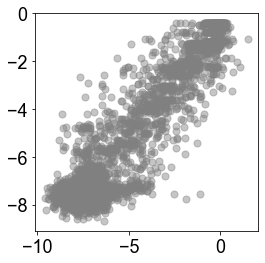

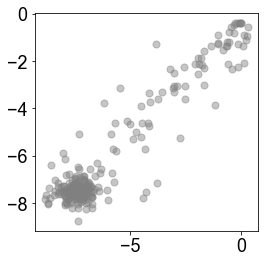

In [275]:
# with struc
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final','struc'])
data.columns = ['seq','score','struc']
seq = data.seq.tolist()
score = data.score.tolist()
struc = data.struc.tolist()

test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                usecols=['seq','score_final','struc'])
test_data.columns = ['seq','score','struc']
test_seq = test_data.seq.tolist()
test_score = test_data.score.tolist()

X_seq = seq2tensor(seq).permute(0,2,1)
X_struc = struc2tensor(struc).permute(0,2,1)
X = torch.cat((X_seq,X_struc), dim=1)
Y = score
Y = torch.tensor(Y).type(torch.float)
criterion = nn.MSELoss()
with torch.no_grad():
    output = model(X)
    loss = criterion(output, Y)

_, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
print(r, p_val)
r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
print(r2)


test_seq = test_data.seq.tolist()
test_score = test_data.score.tolist()
test_struc = test_data.struc.tolist()
X_seq = seq2tensor(test_seq).permute(0,2,1)
X_struc = struc2tensor(test_struc).permute(0,2,1)
X = torch.cat((X_seq,X_struc), dim=1)
Y = test_score
Y = torch.tensor(Y).type(torch.float)
criterion = nn.MSELoss()
with torch.no_grad():
    output = model(X)
    loss = criterion(output, Y)

_, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
print(r, p_val)
r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
print(r2)

In [ ]:
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final'])
data.columns = ['seq','score']
seq = data.seq.tolist()
score = data.score.tolist()
X = seq
Y = score
Y = torch.tensor(Y).type(torch.float)
X = seq2tensor(X).permute(0,2,1)
x1 = X[:, :, 0:10]  # 20
x2 = X[:, :, 11:30] # 21:40
x3 = X[:, :, 31:44] # 41:60
# x1 = X[:, :, 0:20]  # 20
# x2 = X[:, :, 21:40] # 21:40
# x3 = X[:, :, 41:60] # 41:60
layer_output = model.actia(model.convs1_l1(x1)).detach().numpy()


# c1_l1 = model.actia(model.convs1_l1(x1))
# c1_l2 = model.actia(model.convs1_l2(x2))
# c1_l3 = model.actia(model.convs1_l3(x3))
# # c1_l4 = self.actia(self.convs1_l4(x4))

# # Pad the outputs to ensure they have the same length
# max_len = 21
# c1_l1 = F.pad(c1_l1, (0, max_len - c1_l1.size(2)))
# c1_l2 = F.pad(c1_l2, (0, max_len - c1_l2.size(2)))
# c1_l3 = F.pad(c1_l3, (0, max_len - c1_l3.size(2)))
# # c1_l4 = F.pad(c1_l4, (0, max_len - c1_l4.size(2)))

# # # Concatenate along the channel dimension
# c1_l = torch.cat((c1_l1, c1_l2, c1_l3), dim=1)

In [ ]:
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final','struc'])
data.columns = ['seq','score','struc']
seq = data.seq.tolist()
score = data.score.tolist()
struc = data.struc.tolist()
X_seq = seq2tensor(seq).permute(0,2,1)
X_struc = struc2tensor(struc).permute(0,2,1)
X = torch.cat((X_seq,X_struc), dim=1)
Y = score
Y = torch.tensor(Y).type(torch.float)
# x1 = X[:, :, 0:10]  # 20
# x2 = X[:, :, 11:30] # 21:40
# x3 = X[:, :, 31:44] # 41:60
x1 = X[:, :, 0:20]  # 20
# x2 = X[:, :, 21:40] # 21:40
# x3 = X[:, :, 41:60] # 41:60
layer_output = model.actia(model.convs1_l1(x1)).detach().numpy()

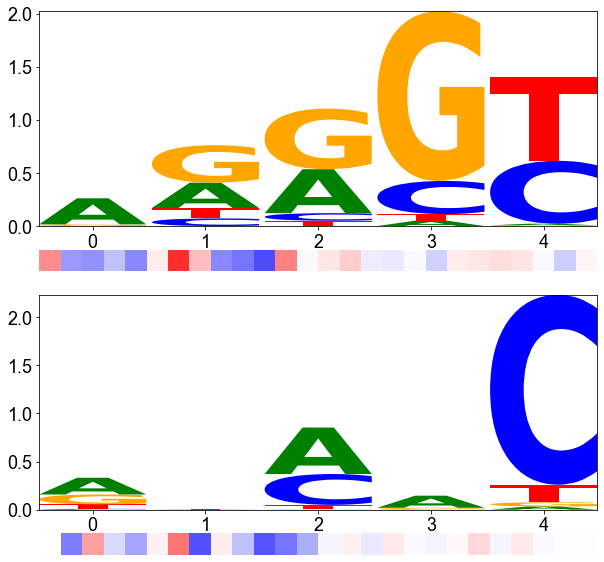

In [276]:
# for motifEffectClear

# model.eval()
# data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
#                   usecols=['seq','score_final'])
# data.columns = ['seq','score']
# seq = data.seq.tolist()
# score = data.score.tolist()
# X = seq
# Y = score
# Y = torch.tensor(Y).type(torch.float)
# X = seq2tensor(X).permute(0,2,1)
# layer_output = model.actia(model.convs1_l(X)).detach().numpy()

model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final','struc'])
data.columns = ['seq','score','struc']
X_seq = data.seq.tolist()
score = data.score.tolist()
struc = data.struc.tolist()
X_seq = seq2tensor(seq).permute(0,2,1)
X_struc = struc2tensor(struc).permute(0,2,1)
X = torch.cat((X_seq,X_struc), dim=1)
Y = score
Y = torch.tensor(Y).type(torch.float)
layer_output = model.actia(model.convs1_l(X)).detach().numpy()


filter_size = 5
df = pd.read_csv(
            f"../data/alphavirus/original/{virus_name}_RandomMutants_Final.csv" 
        )


def generate_positional_counts_mat(seqs, centers, filter_size):
    counts_df_group = []
    center_dict = dict(Counter(centers))
    for i in range(filter_size):
        nt_counts_all = {"A": 0, "T": 0, "C": 0, "G": 0}
        for center in center_dict.keys():
            if (
                center - filter_size // 2 + i >= 0
                and center - filter_size // 2 + i < len(seqs[0])
            ):
                nt_counts = dict(
                    Counter([s[center - filter_size // 2 + i] for s in seqs])
                )
            else:
                nt_counts = {"A": 1, "T": 1, "C": 1, "G": 1}
            for nt in nt_counts.keys():
                nt_counts_all[nt] += nt_counts[nt] * center_dict[center]
        counts_df_group.append(pd.DataFrame.from_records([nt_counts_all]))
    counts_df = pd.concat(counts_df_group).reset_index(drop=True)
    return counts_df

bg_seqs = df["seq"].tolist()
kernel_data = []
kernel_data_dict = []
for i in range(layer_output.shape[1]):
# for i in range(0,1):
    curr_kernel_output = layer_output[:, i, :]
    
    max_activ_idx = np.array(
        [
            np.argmax(curr_kernel_output[j, :])
            for j in range(curr_kernel_output.shape[0])
        ]
    )
    max_activation_vals = np.max(curr_kernel_output, axis=1)
    activ_thresh = max_activation_vals[
        np.argsort(max_activation_vals)[-len(max_activation_vals) // 10]
    ]
    activ_indices = np.where(max_activation_vals > activ_thresh)[0]

    # Abort if too few sequences were activated.
    if len(activ_indices) < 10:
        continue

    seqs = seq

    motifs = []
    centers = []
    for j, center in enumerate(max_activ_idx):
        if (
            center >= filter_size // 2
            and center <= len(seqs[0]) - filter_size // 2 - 1
        ):
            motif = seqs[j][
                center - filter_size // 2 : center + filter_size // 2 + 1
            ]
        elif center < filter_size // 2:
            motif = seqs[j][0 : center + filter_size // 2 + 1]
            motif = "-" * (filter_size - len(motif)) + motif
        elif center > len(seqs[0]) - filter_size // 2 - 1:
            motif = seqs[j][center - filter_size // 2 :]
            motif += "-" * (filter_size - len(motif))
        motifs.append(motif)
        centers.append(center)

    bg_counts_df = generate_positional_counts_mat(
        bg_seqs, centers, filter_size
    )
    counts_df = seqlogo_from_msa(motifs, bg_counts_mat=bg_counts_df)  

    kernel_scores = np.array(
        [
            pearsonr(layer_output[:, i, loc], Y.detach().numpy())[0]
            for loc in range(layer_output.shape[2])
        ]
    )

    kernel_data.append(
                (counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
            )

    order_counts_df = bg_counts_df[['A', 'C', 'G', 'T']]
    kernel_data_dict.append(
        (order_counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
    )

# takekey = self.takeNum
# self.kernel_data.sort(key = takekey)
kernel_data.sort(key=lambda elem: elem[2])
kernel_data_dict.sort(key=lambda elem: elem[2])

n = len(kernel_data)
# Set figure
col = floor(sqrt(n))
row = ceil(n / col)

fig = plt.figure(figsize=(col * 10, row * 5))
gs = plt.GridSpec(row * 2, col, figure=fig, height_ratios=[10, 1] * row)

for i, (counts_df, idx, kernel_loc, n_motifs, kernel_scores) in enumerate(
    kernel_data[:n]
):
    ax = fig.add_subplot(gs[i // col * 2, i % col])
    lm.Logo(counts_df, ax=ax, color_scheme="classic",font_name='No')
    # ax.set_ylim([0, 4])
    ax.set_xticks(list(range(len(counts_df))))

    ax2 = fig.add_subplot(gs[i // col * 2 + 1, i % col])
    sns.heatmap(
        kernel_scores.reshape((1, -1)),
        ax=ax2,
        cmap="seismic",
        vmin=-1,
        vmax=1,
        cbar=False,
    )
    ax2.axis("off")
# save_fig(
#     f"{virus_name}_{date}_{model_name}_conv_2"
# )

In [ ]:
filter_size = 9
window_idx = 0
window = 'l1'

df = pd.read_csv(
            f"../data/alphavirus/original/{virus_name}_RandomMutants_Final.csv" 
        )


def generate_positional_counts_mat(seqs, centers, filter_size):
    counts_df_group = []
    center_dict = dict(Counter(centers))
    for i in range(filter_size):
        nt_counts_all = {"A": 0, "T": 0, "C": 0, "G": 0}
        for center in center_dict.keys():
            if (
                center - filter_size // 2 + i >= 0
                and center - filter_size // 2 + i < len(seqs[0])
            ):
                nt_counts = dict(
                    Counter([s[center - filter_size // 2 + i] for s in seqs])
                )
            else:
                nt_counts = {"A": 1, "T": 1, "C": 1, "G": 1}
            for nt in nt_counts.keys():
                nt_counts_all[nt] += nt_counts[nt] * center_dict[center]
        counts_df_group.append(pd.DataFrame.from_records([nt_counts_all]))
    counts_df = pd.concat(counts_df_group).reset_index(drop=True)
    return counts_df

bg_seqs = df["seq"].tolist()
kernel_data = []
kernel_data_dict = []
for i in range(layer_output.shape[1]):
# for i in range(0,1):
    curr_kernel_output = layer_output[:, i, :]
    
    max_activ_idx = np.array(
        [
            np.argmax(curr_kernel_output[j, :]) + window_idx
            for j in range(curr_kernel_output.shape[0])
        ]
    )
    max_activation_vals = np.max(curr_kernel_output, axis=1)
    activ_thresh = max_activation_vals[
        np.argsort(max_activation_vals)[-len(max_activation_vals) // 10]
    ]
    activ_indices = np.where(max_activation_vals > activ_thresh)[0]

    # Abort if too few sequences were activated.
    if len(activ_indices) < 10:
        continue

    seqs = seq

    motifs = []
    centers = []
    for j, center in enumerate(max_activ_idx):
        if (
            center >= filter_size // 2
            and center <= len(seqs[0]) - filter_size // 2 - 1
        ):
            motif = seqs[j][
                center - filter_size // 2 : center + filter_size // 2 + 1
            ]
        elif center < filter_size // 2:
            motif = seqs[j][0 : center + filter_size // 2 + 1]
            motif = "-" * (filter_size - len(motif)) + motif
        elif center > len(seqs[0]) - filter_size // 2 - 1:
            motif = seqs[j][center - filter_size // 2 :]
            motif += "-" * (filter_size - len(motif))
        motifs.append(motif)
        centers.append(center)

    bg_counts_df = generate_positional_counts_mat(
        bg_seqs, centers, filter_size
    )
    counts_df = seqlogo_from_msa(motifs, bg_counts_mat=bg_counts_df)  
    # counts_df = lm.alignment_to_matrix(motifs, to_type='information',background=bg_counts_df)
    kernel_scores = np.array(
        [
            pearsonr(layer_output[:, i, loc], Y.detach().numpy())[0]
            for loc in range(layer_output.shape[2])
        ]
    )

    kernel_data.append(
                (counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
            )

    order_counts_df = bg_counts_df[['A', 'C', 'G', 'T']]
    kernel_data_dict.append(
        (order_counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
    )

kernel_data.sort(key=lambda elem: elem[2])
kernel_data_dict.sort(key=lambda elem: elem[2])

n = len(kernel_data)
# Set figure
col = floor(sqrt(n))
row = ceil(n / col)

fig = plt.figure(figsize=(col * 10, row * 5))
gs = plt.GridSpec(row * 2, col, figure=fig, height_ratios=[10, 1] * row)

for i, (counts_df, idx, kernel_loc, n_motifs, kernel_scores) in enumerate(
    kernel_data[:n]
):
    _, ax = plt.subplots(1, 1, figsize=(filter_size/2,3))
    lm.Logo(counts_df, ax=ax, color_scheme="classic",font_name='No')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.set_xticks([])
    ax.tick_params(width=2) 
    ax.set_yticks([0,1,2])
    # ax.text(
    #     len(counts_df) // 2,
    #     3.96,
    #     "Kernel %d: center=%d, n=%d" % (idx, kernel_loc, n_motifs),
    #     ha="center",
    #     va="top",
    #     fontsize=12,
    # )
    # ax.set_yticks([])
    # ax2 = fig.add_subplot(gs[i // col * 2 + 1, i % col])
    # sns.heatmap(
    #     kernel_scores.reshape((1, -1)),
    #     ax=ax2,
    #     cmap="seismic",
    #     vmin=-1,
    #     vmax=1,
    #     cbar=False,
    # )
    # ax2.axis("off")
# save_fig(
#     f"{virus_name}_{date}_{model_name}_conv1_{window}_withE"
# )

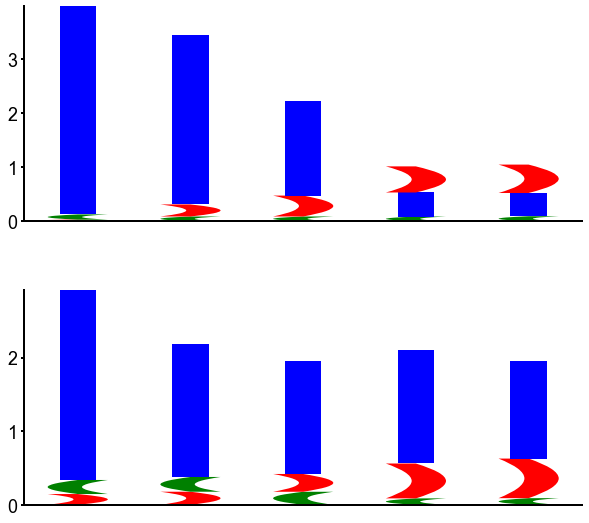

In [277]:
# for motifEffectClear

model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final','struc'])
data.columns = ['seq','score','struc']
X_seq = data.seq.tolist()
score = data.score.tolist()
struc = data.struc.tolist()
X_seq = seq2tensor(seq).permute(0,2,1)
X_struc = struc2tensor(struc).permute(0,2,1)
X = torch.cat((X_seq,X_struc), dim=1)
Y = score
Y = torch.tensor(Y).type(torch.float)
layer_output = model.actia(model.convs1_l(X)).detach().numpy()


filter_size = 5
window_idx = 0
window = 'l1'

df = pd.read_csv(
            f'./data/{virus_name}_{date}_train_tol_seq.csv' 
        )


def generate_positional_counts_mat_struc(seqs, centers, filter_size):
    counts_df_group = []
    center_dict = dict(Counter(centers))
    for i in range(filter_size):
        nt_counts_all = {".": 0, "(": 0, ")": 0}
        for center in center_dict.keys():
            if (
                center - filter_size // 2 + i >= 0
                and center - filter_size // 2 + i < len(seqs[0])
            ):
                nt_counts = dict(
                    Counter([s[center - filter_size // 2 + i] for s in seqs])
                )
            else:
                nt_counts = {".": 1, "(": 1, ")": 1}
            for nt in nt_counts.keys():
                nt_counts_all[nt] += nt_counts[nt] * center_dict[center]
        counts_df_group.append(pd.DataFrame.from_records([nt_counts_all]))
    counts_df = pd.concat(counts_df_group).reset_index(drop=True)
    return counts_df

bg_seqs = df["struc"].tolist()
kernel_data = []
kernel_data_dict = []
for i in range(layer_output.shape[1]):
# for i in range(0,1):
    curr_kernel_output = layer_output[:, i, :]
    
    max_activ_idx = np.array(
        [
            np.argmax(curr_kernel_output[j, :]) + window_idx
            for j in range(curr_kernel_output.shape[0])
        ]
    )
    max_activation_vals = np.max(curr_kernel_output, axis=1)
    activ_thresh = max_activation_vals[
        np.argsort(max_activation_vals)[-len(max_activation_vals) // 10]
    ]
    activ_indices = np.where(max_activation_vals > activ_thresh)[0]

    # Abort if too few sequences were activated.
    if len(activ_indices) < 10:
        continue

    seqs = struc

    motifs = []
    centers = []
    for j, center in enumerate(max_activ_idx):
        if (
            center >= filter_size // 2
            and center <= len(seqs[0]) - filter_size // 2 - 1
        ):
            motif = seqs[j][
                center - filter_size // 2 : center + filter_size // 2 + 1
            ]
        elif center < filter_size // 2:
            motif = seqs[j][0 : center + filter_size // 2 + 1]
            motif = "-" * (filter_size - len(motif)) + motif
        elif center > len(seqs[0]) - filter_size // 2 - 1:
            motif = seqs[j][center - filter_size // 2 :]
            motif += "-" * (filter_size - len(motif))
        motifs.append(motif)
        centers.append(center)

    bg_counts_df = generate_positional_counts_mat_struc(
        bg_seqs, centers, filter_size
    )
    counts_df = seqlogo_from_msa(motifs, bg_counts_mat=bg_counts_df)  
    # counts_df = lm.alignment_to_matrix(motifs, to_type='information',background=bg_counts_df)
    kernel_scores = np.array(
        [
            pearsonr(layer_output[:, i, loc], Y.detach().numpy())[0]
            for loc in range(layer_output.shape[2])
        ]
    )

    kernel_data.append(
                (counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
            )

    order_counts_df = bg_counts_df[['.', '(', ')']]
    kernel_data_dict.append(
        (order_counts_df, i, mode(centers)[0], len(motifs), kernel_scores)
    )

kernel_data.sort(key=lambda elem: elem[2])
kernel_data_dict.sort(key=lambda elem: elem[2])

n = len(kernel_data)
# Set figure
col = floor(sqrt(n))
row = ceil(n / col)

fig = plt.figure(figsize=(col * 10, row * 5))
gs = plt.GridSpec(row * 2, col, figure=fig, height_ratios=[10, 1] * row)

for i, (counts_df, idx, kernel_loc, n_motifs, kernel_scores) in enumerate(
    kernel_data[:n]
):
    ax = fig.add_subplot(gs[i // col * 2, i % col])
    lm.Logo(counts_df, ax=ax, color_scheme={'.':'blue','(':'green',')':'red'},font_name='No')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.set_xticks([])
    ax.tick_params(width=2) 

# save_fig(
#     f"{virus_name}_{date}_{model_name}_conv1_{window}_withSecStruc_2"
# )

In [ ]:
conv1_weights = model.convs1_l3.weight.data
motif_weights = conv1_weights[0]
motif_prop = torch.softmax(motif_weights, dim=0)
prop = motif_prop.detach().numpy()
ss_df = pd.DataFrame(prop).transpose()
ss_df.columns = ['A','C','G','T','.','(',')']
ss_df = lm.transform_matrix(df=ss_df,from_type='probability',to_type='weight')
_, ax = plt.subplots(1, 1, figsize=(6,6))
ss_logo = lm.Logo(ss_df,shade_below=.5,fade_below=.5,ax=ax)

In [ ]:
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final'])
data.columns = ['seq','score']
seq = data.seq.tolist()
score = data.score.tolist()
X = seq
Y = score
Y = torch.tensor(Y).type(torch.float)
X = seq2tensor(X).permute(0,2,1)
layer_output = model.actia(model.convs1_l(X)).detach().numpy()

all_kernel = []
for i in range(layer_output.shape[1]):
    kernel_scores = np.array(
        [
            pearsonr(layer_output[:, i, loc], Y.detach().numpy())[0]
            for loc in range(layer_output.shape[2])
        ]
    )
    all_kernel.append(abs(kernel_scores))
    # all_kernel.append(kernel_scores)
kernel_df = pd.DataFrame(np.array(all_kernel))
kernel_df = kernel_df.dropna()
sns.clustermap(kernel_df.iloc[: , np.arange(0,85)] , 
               cmap='coolwarm',
               col_cluster=False,
               figsize=(10,5),
               )
# save_fig('vee_newmol_prcluster_motif')

kernel_sum = kernel_df.sum(axis=0).values.tolist()
_, ax = plt.subplots(1, 1, figsize=(15,2.5))
plt.plot(np.arange(85),kernel_sum,
         linewidth=2,
         marker='o',
         markersize=10,
         markerfacecolor='white',
         c='black',
             )

ax.set_yticks([])
# ax.set_xticks([])
ax.set_xlim(-0.5,84.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# save_fig(f"{virus_name}_{date}_{model_name}_kernel_max_v2")

In [ ]:
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final'])
data.columns = ['seq','score']
seq = data.seq.tolist()
score = data.score.tolist()
X = seq
Y = score
Y = torch.tensor(Y).type(torch.float)
X = seq2tensor(X).permute(0,2,1)
# x1 = X[:, :, 0:20]  # 20
# x2 = X[:, :, 11:30] # 21:40
# x3 = X[:, :, 31:44] # 41:60
x1 = X[:, :, 0:20]  # 20
x2 = X[:, :, 21:40] # 21:40
x3 = X[:, :, 41:60] # 41:60
convs1_l1_out = model.actia(model.convs1_l1(x1)).sum(axis=2).squeeze().detach().numpy()
convs1_l2_out = model.actia(model.convs1_l2(x2)).sum(axis=2).squeeze().detach().numpy()
convs1_l3_out = model.actia(model.convs1_l3(x3)).sum(axis=2).squeeze().detach().numpy()

# convs1_l1_out = model.convs1_l1(x1).sum(axis=2).squeeze().detach().numpy()
# convs1_l2_out = model.convs1_l2(x2).sum(axis=2).squeeze().detach().numpy()
# convs1_l3_out = model.convs1_l3(x3).sum(axis=2).squeeze().detach().numpy()
layer_output = torch.tensor([convs1_l1_out,convs1_l2_out,convs1_l3_out]).type(torch.float32).permute(1,0).detach().numpy()

import umap
reducer = umap.UMAP(low_memory=True,n_components=2)
conv_output_reduce = reducer.fit_transform(layer_output)
plt.scatter(
    conv_output_reduce[:,0],
    conv_output_reduce[:,1],
    c=Y.detach().numpy(),
    alpha=0.05,
)

In [ ]:
plt.scatter(
    conv_output_reduce[:,0],
    conv_output_reduce[:,1],
    c=Y.detach().numpy(),
    alpha=0.05,
    cmap='RdGy'
)

In [ ]:
import umap
# reducer = umap.UMAP(low_memory=True,n_components=1)
# conv_output_reduce = reducer.fit_transform(layer_output)
plt.scatter(
    convs1_l3_out,
    Y.detach().numpy(),
    alpha=0.1
)

## MotifLocation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import mse_loss
from torch.utils.data import DataLoader, TensorDataset

# Define the Transformer model
class TransformerRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, num_heads):
        super(TransformerRegressor, self).__init__()

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        embedded = self.embedding(input)
        embedded = embedded.permute(1, 0, 2)  # Shape: (seq_len, batch_size, hidden_size)
        output = self.transformer(embedded, embedded)
        output = output.permute(1, 0, 2)  # Shape: (batch_size, seq_len, hidden_size)
        output = self.fc(output[:, -1, :])  # Take the last time step's output
        return output

# Example usage
input_size = 5  # Example vocabulary size
hidden_size = 256  # Hidden size of the transformer model
output_size = 1  # Regression output size
num_layers = 4  # Number of encoder/decoder layers in the transformer
num_heads = 8  # Number of attention heads

# # Create dummy data
# input_data = torch.LongTensor([[1, 2, 2, 2], [4, 2, 3, 4], [1, 2, 2, 2], [4, 2, 3, 4],[1, 2, 2, 2], [4, 2, 3, 4]])
# target_data = torch.randn((6, output_size))  # Shape: (batch_size, output_size)

# # Create the model
# model = TransformerRegressor(input_size, hidden_size, output_size, num_layers, num_heads)

# # Define loss function and optimizer
# criterion = mse_loss
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Create dataloaders for training
# dataset = TensorDataset(input_data, target_data)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# # Training loop
# for epoch in range(10):
#     for inputs, targets in dataloader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()

# # Test the trained model
# test_input = torch.LongTensor([[1, 2, 2, 2]])
# model.eval()
# with torch.no_grad():
#     test_output = model(test_input)
#     print(test_output)

In [ ]:
num = 121
input_size = 5  # Example vocabulary size
hidden_size = 64  # Hidden size of the transformer model
output_size = 1  # Regression output size
num_layers = 1  # Number of encoder/decoder layers in the transformer
num_heads = 8  # Number of attention heads

for paras in [[15,9,9]]:
    num +=1
    time_start = time.time()
    # model = MotifFind(paras=paras)
    # model_name = 'MotifFind'
    model = TransformerRegressor(input_size, hidden_size, output_size, num_layers, num_heads)
    model_name = 'TransformerRegressor'

    data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                    usecols=['seq','score_final'])
    data.columns = ['seq','score']
    model.train()
    criterion = nn.MSELoss()
    batch_num = 64
    epochs = 6
    # opt = torch.optim.Adam(model.parameters(), lr=5e-3) # suitable for motiffind deepcnn
    opt = torch.optim.Adam(model.parameters(), lr=3e-4) # suitable for deepcnn bilstm
    epoch_loss = []
    epoch_r = []
    epoch_r2 = []
    for epoch in tqdm(range(epochs)):
        losses = []
        pearsonrs = []
        r2s = []
        data_random = data.sample(n=len(data)).reset_index(drop=True)
        seq = data_random.seq.tolist()
        score = data_random.score.tolist()
        for i in range(0,len(seq),batch_num):
            # print(i)
            X = seq[i:i+batch_num]
            Y = score[i:i+batch_num]
            Y = torch.tensor(Y).type(torch.float)
            X = seq2tsor_transformer(X)
            output = model(X).squeeze()
            loss = criterion(output, Y)
            model.zero_grad()
            loss.backward()
            opt.step()
            losses.append(loss.item())
            r,_ = pearsonr(output.detach().numpy(), Y.detach().numpy())
            r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
            pearsonrs.append(r)
            r2s.append(r2)
        epoch_loss.append(np.mean(losses))
        epoch_r.append(np.mean(pearsonrs))
        epoch_r2.append(np.mean(r2s))
    time_end = time.time()
    time_cost = time_end - time_start


    model.eval()
    test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                    usecols=['seq','score_final'])
    test_data.columns = ['seq','score']
    test_seq = test_data.seq.tolist()
    test_score = test_data.score.tolist()
    X = test_seq
    Y = test_score
    Y = torch.tensor(Y).type(torch.float)
    X = seq2tsor_transformer(X)
    criterion = nn.MSELoss()
    with torch.no_grad():
        output = model(X).squeeze()
        loss = criterion(output, Y)

    test_r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
    test_r2 = r2_score(Y.detach().numpy(), output.detach().numpy())

    # np.save(f"temp/{model_name}_{virus_name}_{date}_paras_{num}.npy", {"epoch_loss": epoch_loss, "epoch_r": epoch_r, 'time_cost': time_cost, 'paras':paras, 
    #         'test_r':test_r,'test_r2':test_r2,}
    #         )


In [ ]:
model.eval()
data = pd.read_csv(f'./data/{virus_name}_{date}_train_tol_seq.csv', 
                  usecols=['seq','score_final'])
data.columns = ['seq','score']
seq = data.seq.tolist()
score = data.score.tolist()

test_data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                  usecols=['seq','score_final'])
test_data.columns = ['seq','score']
test_seq = test_data.seq.tolist()
test_score = test_data.score.tolist()

# X = seq
# Y = score
# Y = torch.tensor(Y).type(torch.float)
# X = seq2tensor(X).permute(0,2,1)
# criterion = nn.MSELoss()
# with torch.no_grad():
#     output = model(X)
#     loss = criterion(output, Y)

# _, ax = plt.subplots(1, 1, figsize=(4,4))
# ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
# r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
# print(r, p_val)
# r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
# print(r2)

X = test_seq
Y = test_score
Y = torch.tensor(Y).type(torch.float)
X = seq2tsor_transformer(X)
criterion = nn.MSELoss()
with torch.no_grad():
    output = model(X).squeeze()
    loss = criterion(output, Y)
    print(loss)

_, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter( Y.detach().numpy(), output.detach().numpy(),alpha=0.45, s=50, facecolor="gray")
r, p_val = pearsonr(output.detach().numpy(), Y.detach().numpy())
print(r, p_val)
r2 = r2_score(Y.detach().numpy(), output.detach().numpy())
print(r2)

## structure


In [ ]:
data = pd.read_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', 
                    usecols=['seq','score_final','distance'])
for idx in range(len(data)):
    seq0 = data.seq.tolist()[idx]
    # seq1 = ''.join([seq0,'ATGGAGAAAGTTCACGTTGGCTCTTCG'])
    seq1 = seq0
    sec_str = RNA.fold(seq1)[0]
    data.at[idx,'struc'] = sec_str

In [ ]:
data.to_csv(f'./data/{virus_name}_{date}_test_tol_seq.csv', index=None)